In [1]:
import pandas as pd
PATH_CSV="D:/Faculta/An III/Sem 2/Big Data/proiect/merc.csv"
def loadCsv(dataPath = PATH_CSV):
    return pd.read_csv(dataPath)

In [2]:
data = loadCsv()
data.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1


In [3]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

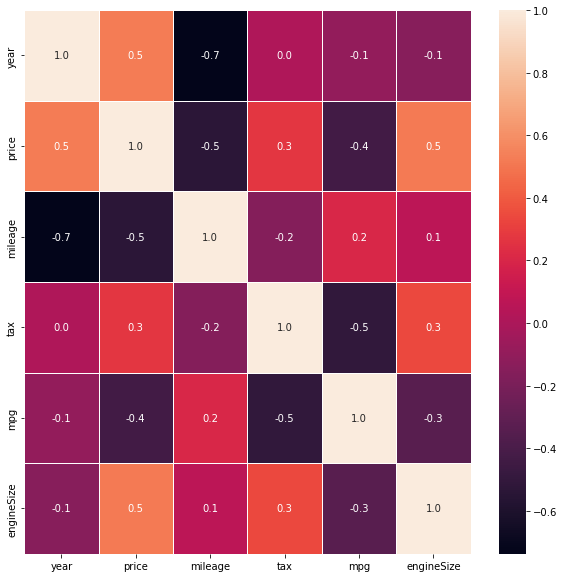

In [8]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [9]:
data.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

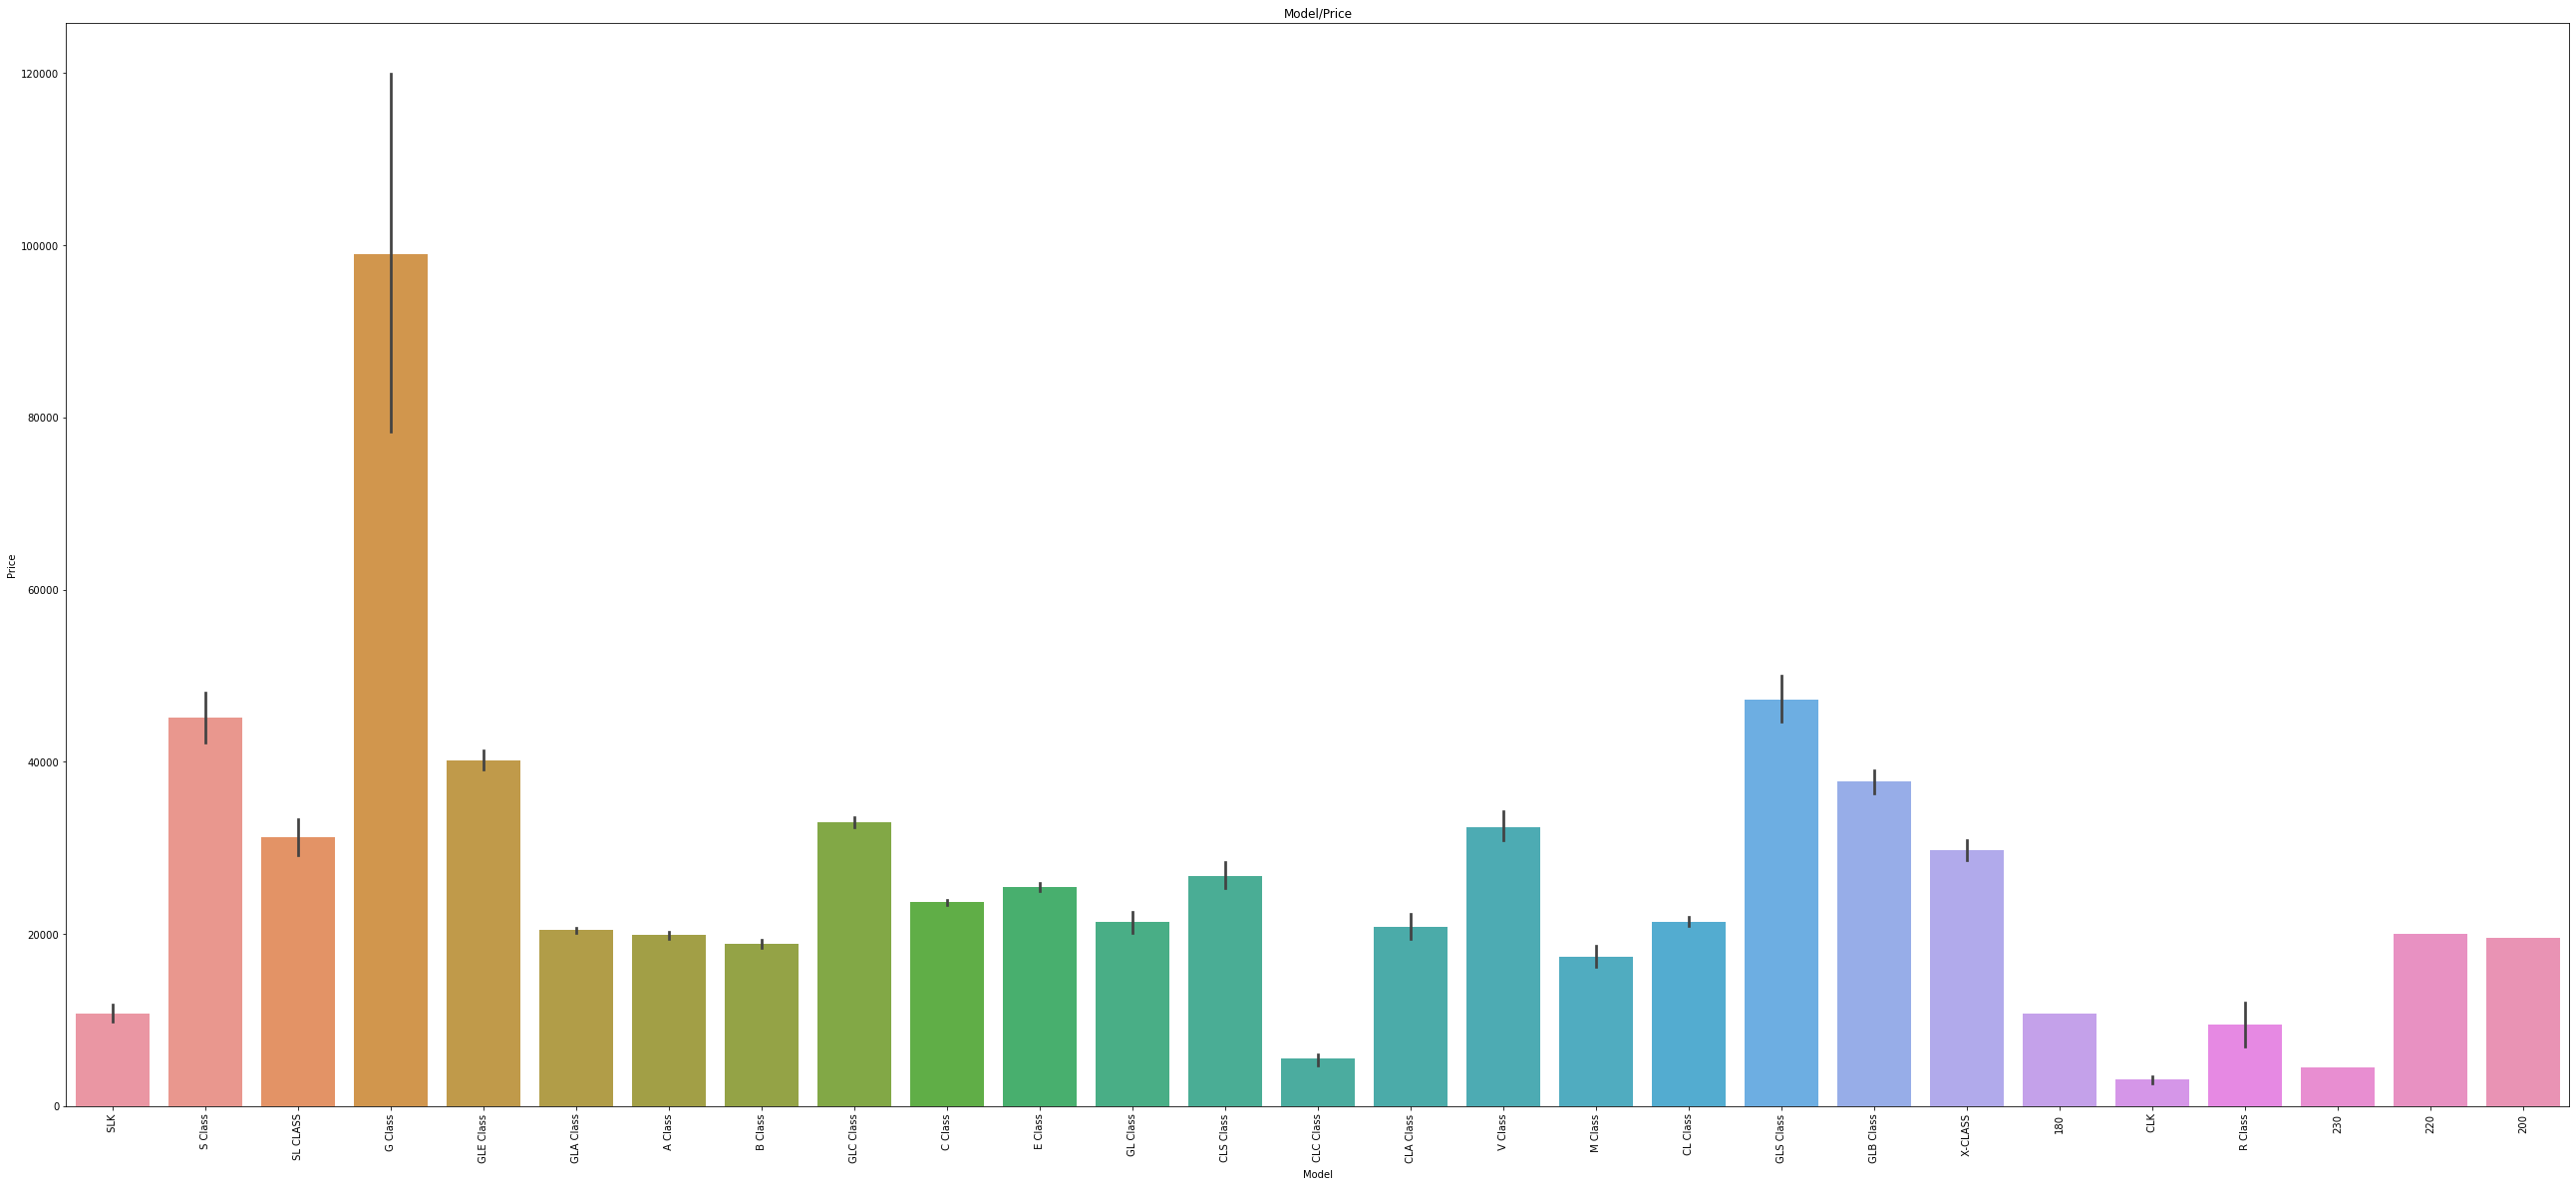

In [10]:
data_model = data.model
data_price = data.price
plt.figure(figsize=(45,20))
sns.barplot(x = data_model, y = data_price)
plt.xticks(rotation = 90) 
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model/Price')
plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


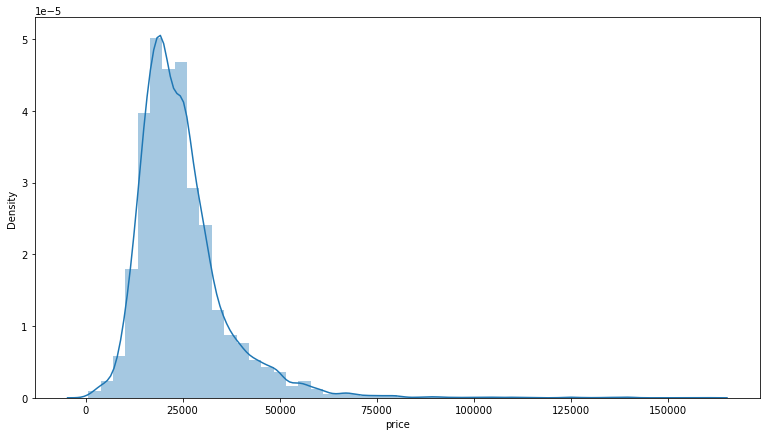

In [11]:
plt.figure(figsize=(13,7))
sns.distplot(data["price"])
plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


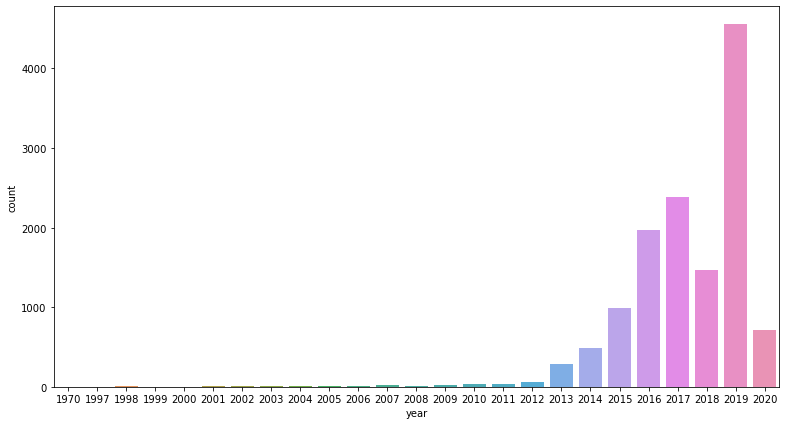

In [12]:
plt.figure(figsize=(13,7))
sns.countplot(data.year)
plt.show()

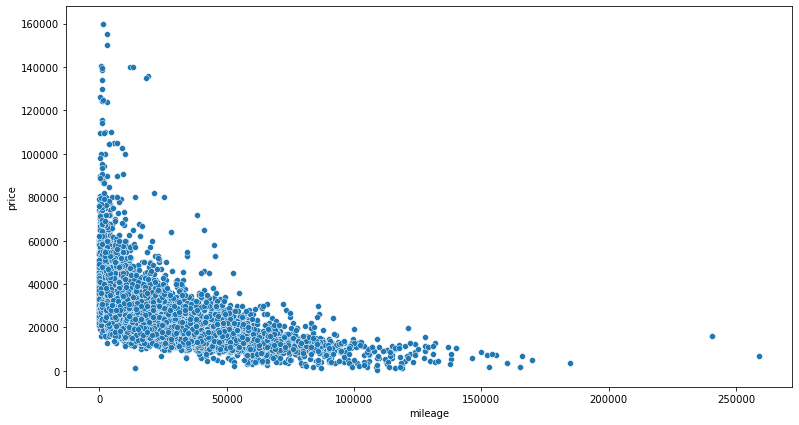

In [13]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=data.mileage, y=data.price, data=data)
plt.show()


In [14]:
data.sort_values('price', ascending=False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9133,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
8821,A Class,2020,138439,Semi-Auto,1000,Petrol,145,22.1,4.0
5902,G Class,2018,135771,Semi-Auto,19000,Petrol,145,21.4,4.0
7864,G Class,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0


In [15]:
data.sort_values('price', ascending=True).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11174,S Class,2001,1695,Automatic,108800,Diesel,325,31.7,3.2
12710,C Class,2006,1695,Automatic,153000,Petrol,300,33.6,1.8
12766,C Class,2004,1780,Automatic,118000,Diesel,265,41.5,2.2
12009,A Class,2007,1800,Automatic,84000,Petrol,200,42.8,1.5
11764,SLK,1998,1990,Automatic,99300,Petrol,265,32.1,2.3


In [16]:
len(data)

13119

In [17]:
len(data) * 0.01

131.19

In [18]:
nnpDf = data.sort_values("price",ascending = False).iloc[131:]
nnpDf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6177,GLS Class,2019,65990,Semi-Auto,5076,Diesel,150,30.4,3.0
5779,C Class,2020,65990,Semi-Auto,999,Petrol,145,28.0,4.0
3191,C Class,2020,65980,Semi-Auto,3999,Petrol,145,28.0,4.0
4727,C Class,2019,65000,Semi-Auto,3398,Petrol,145,27.2,4.0
8814,S Class,2019,64999,Semi-Auto,119,Petrol,145,40.9,3.0
...,...,...,...,...,...,...,...,...,...
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0


In [19]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [20]:
nnpDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


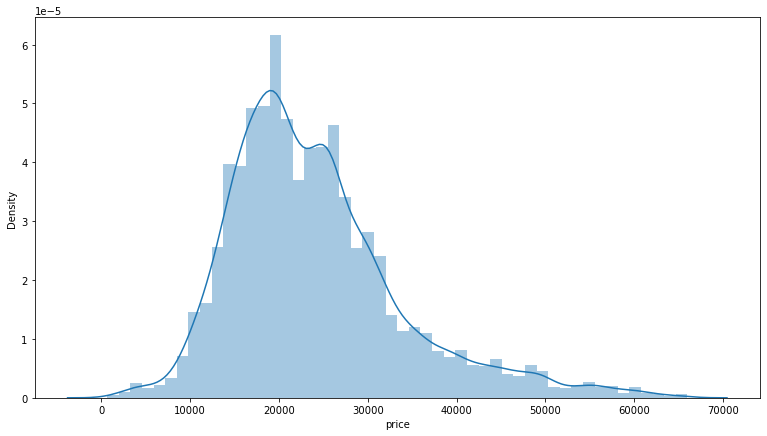

In [21]:
plt.figure(figsize=(13,7))
sns.distplot(nnpDf["price"])
plt.show()

In [22]:
nnpDf.groupby('year').mean()['price']

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [23]:
nnpDf[nnpDf.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [24]:
nnpDf.drop('transmission', axis=1, inplace=True)

In [25]:
nnpDf.drop('fuelType', axis=1, inplace=True)

In [26]:
nnpDf.drop('model', axis=1,inplace=True)

In [27]:
df = nnpDf

In [28]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


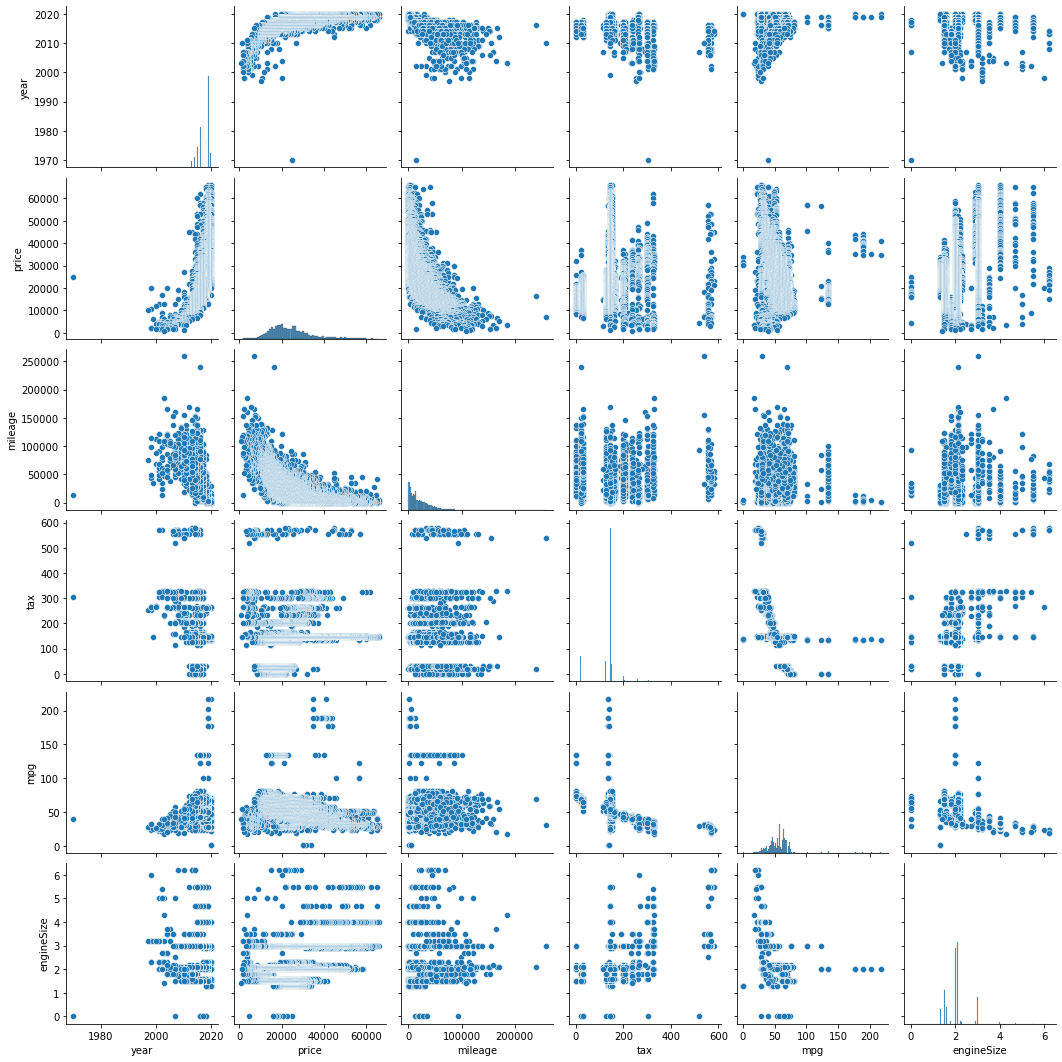

In [29]:
sns.pairplot(df)
plt.show()

In [30]:
y = df['price'].values
x = df.drop('price', axis=1).values

In [31]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [32]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

In [34]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
y_pred_lin_reg = linear_regression.predict(x_test)

In [35]:
print(f'y_test: {y_test}\nprediction: {y_pred_lin_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24873.57575117 16481.40628173 21583.82921835 ...  7238.85714078
 21349.44356384 37354.78023641]


In [79]:
print('R Square Score for Linear Regression : ', r2_score(y_test, y_pred_lin_reg))
print('Root Mean Squared  Error for Linear Regression: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin_reg)))

R Square Score for Linear Regression :  0.7235429682066146
Root Mean Squared  Error for Linear Regression:  5052.968002792194


In [41]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(x_train, y_train)
y_pred_dt_reg = decision_tree_reg.predict(x_test)

In [42]:
print(f'y_test: {y_test}\nprediction: {y_pred_dt_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24549. 13991. 24124. ... 11599. 17990. 44980.]


In [43]:
print('R Square Score for Decision Tree Regression : ', r2_score(y_test, y_pred_dt_reg))
print('Root Mean Squared  Error for Decision Tree Regression : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt_reg)))

R Square Score for Decision Tree Regression :  0.8514049939401422
Root Mean Squared  Error for Decision Tree Regression :  3704.5446595253975


In [44]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 50, random_state= 0 ) 
random_forest_reg.fit(x_train, y_train)
y_pred_rf_reg = random_forest_reg.predict(x_test)

In [45]:
print(f'y_test: {y_test}\nprediction: {y_pred_rf_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24350.   14691.38 21181.42 ... 10812.78 18399.36 46937.7 ]


In [46]:
print('R Square Score for Random Forest Regression : ', r2_score(y_test, y_pred_rf_reg))
print('Root Mean Squared  Error for Random Forest Regression : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_reg)))

R Square Score for Random Forest Regression :  0.904159941724667
Root Mean Squared  Error for Random Forest Regression :  2975.1321581777925


In [47]:
df.head(20)

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
8083,2018,64999,41102,145,23.0,5.5
267,2019,64998,313,145,31.4,4.7
2956,2020,64980,3999,145,40.4,3.0
2274,2020,64980,3999,145,40.4,3.0
12160,2018,64950,13000,145,28.5,3.0


In [48]:
print(random_forest_reg.predict([[2020, 1000, 140, 29.2, 4.0]]))

[60682.56]


In [49]:
df.tail(20)

,year,price,mileage,tax,mpg,engineSize
49,2006,2880,66000,160,52.3,2.0
11263,2007,2795,79485,200,45.6,1.5
11943,2005,2690,109000,325,32.1,1.8
12765,2004,2495,104000,325,31.7,1.8
11795,2005,2490,101980,200,47.9,2.0
11906,2007,2478,81000,160,49.6,2.0
11857,2002,2140,52700,325,31.4,2.0
11383,2005,1995,105000,260,43.5,2.1
11378,2004,1995,165000,330,20.0,3.7
11808,1998,1990,113557,265,32.1,2.3


In [50]:
print(random_forest_reg.predict([[2000, 90000, 290, 30.4, 3.0]]))

[4986.56]


In [51]:
!pip install linearmodels

In [52]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

<AxesSubplot:xlabel='engineSize', ylabel='price'>

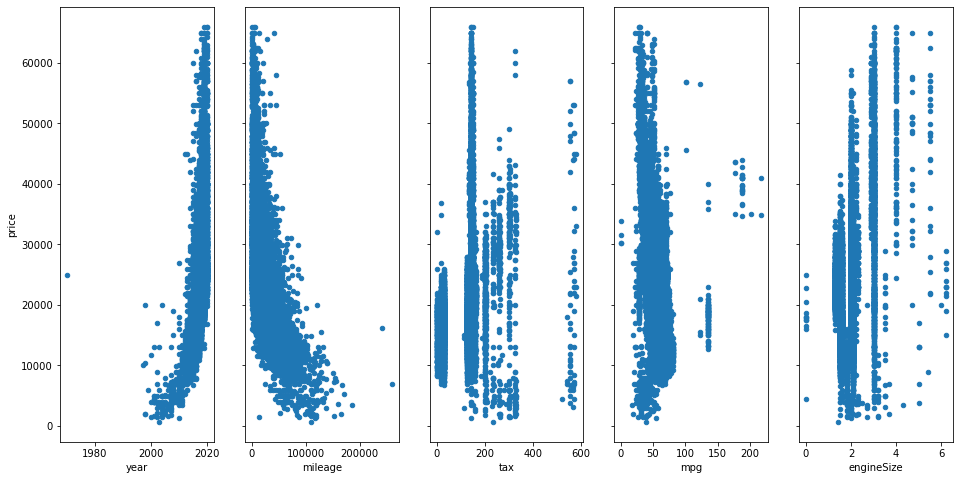

In [53]:
fig,axs= plt.subplots(1,5,sharey=True) # sharey : share same y axis across the plot
df.plot(kind="scatter",x='year',y='price',ax=axs[0],figsize=(16,8))
df.plot(kind="scatter",x='mileage',y='price',ax=axs[1],figsize=(16,8))
df.plot(kind="scatter",x='tax',y='price',ax=axs[2],figsize=(16,8))
df.plot(kind="scatter",x='mpg',y='price',ax=axs[3],figsize=(16,8))
df.plot(kind="scatter",x='engineSize',y='price',ax=axs[4],figsize=(16,8))

In [54]:
df['const'] = 1
feature_x=['const', 'year','mileage','tax','mpg','engineSize']
X=df[feature_x]
y=df.price

In [55]:
regYear = sm.OLS(y, exog=df[['const','year']])
type(regYear)

statsmodels.regression.linear_model.OLS

In [56]:
resultsYear = regYear.fit()
type(resultsYear)
print(resultsYear.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     6981.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:57:42   Log-Likelihood:            -1.3508e+05
No. Observations:               12988   AIC:                         2.702e+05
Df Residuals:                   12986   BIC:                         2.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.257e+06   6.32e+04    -83.170      0.0

In [57]:
np.std(resultsYear.resid)

7956.426813329512

In [58]:
regM = sm.OLS(y, exog=df[['const','mileage']])
type(regM)

statsmodels.regression.linear_model.OLS

In [59]:
resultsM = regM.fit()
type(resultsM)
print(resultsM.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     7166.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:57:42   Log-Likelihood:            -1.3502e+05
No. Observations:               12988   AIC:                         2.701e+05
Df Residuals:                   12986   BIC:                         2.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.022e+04    100.480    300.739      0.0

In [60]:
np.std(resultsM.resid)

7919.697983399669

In [61]:
regTax = sm.OLS(y, exog=df[['const','tax']])
type(regTax)

statsmodels.regression.linear_model.OLS

In [62]:
resultsTax = regTax.fit()
type(resultsTax)
print(resultsTax.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.16e-260
Time:                        20:57:42   Log-Likelihood:            -1.3728e+05
No. Observations:               12988   AIC:                         2.746e+05
Df Residuals:                   12986   BIC:                         2.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.827e+04    184.170     99.202      0.0

In [63]:
np.std(resultsTax.resid)

9424.618078727284

In [64]:
regMpg = sm.OLS(y, exog=df[['const','mpg']])
type(regMpg)

statsmodels.regression.linear_model.OLS

In [65]:
regEng = sm.OLS(y, exog=df[['const','engineSize']])
type(regEng)

statsmodels.regression.linear_model.OLS

In [66]:
resultsMpg = regMpg.fit()
type(resultsMpg)
print(resultsMpg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2737.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:57:42   Log-Likelihood:            -1.3664e+05
No. Observations:               12988   AIC:                         2.733e+05
Df Residuals:                   12986   BIC:                         2.733e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.926e+04    300.771    130.538      0.0

In [67]:
np.std(resultsMpg.resid)

8966.146760551072

In [68]:
resultsEng = regEng.fit()
type(resultsEng)
print(resultsEng.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     2869.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:57:42   Log-Likelihood:            -1.3658e+05
No. Observations:               12988   AIC:                         2.732e+05
Df Residuals:                   12986   BIC:                         2.732e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7912.4909    311.730     25.383      0.0

In [69]:
np.std(resultsEng.resid)

8928.588793773466

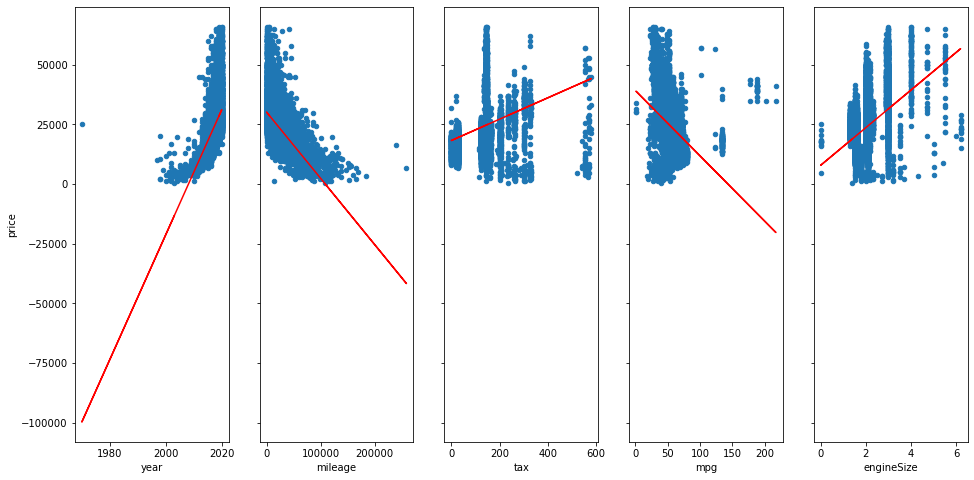

In [70]:
fig,axs= plt.subplots(1,5,sharey=True) # sharey : share same y axis across the plot
df.plot(kind="scatter",x='year',y='price',ax=axs[0],figsize=(16,8))
axs[0].plot(df['year'], resultsYear.predict(df[['const','year']]), color="r")
df.plot(kind="scatter",x='mileage',y='price',ax=axs[1],figsize=(16,8))
axs[1].plot(df['mileage'], resultsM.predict(df[['const','mileage']]), color="r")
df.plot(kind="scatter",x='tax',y='price',ax=axs[2],figsize=(16,8))
axs[2].plot(df['tax'], resultsTax.predict(df[['const','tax']]), color="r")
df.plot(kind="scatter",x='mpg',y='price',ax=axs[3],figsize=(16,8))
axs[3].plot(df['mpg'], resultsMpg.predict(df[['const','mpg']]), color="r")
df.plot(kind="scatter",x='engineSize',y='price',ax=axs[4],figsize=(16,8))
axs[4].plot(df['engineSize'], resultsEng.predict(df[['const','engineSize']]), color="r")

In [71]:
regAll = sm.OLS(y, exog=X)
type(regAll)
resultsAll = regAll.fit()
type(resultsAll)
print(resultsAll.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     6492.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:57:43   Log-Likelihood:            -1.2974e+05
No. Observations:               12988   AIC:                         2.595e+05
Df Residuals:                   12982   BIC:                         2.595e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.08e+06   6.32e+04    -64.550      0.0

In [72]:
np.std(resultsAll.resid)

5273.335483162725

In [73]:
regBest = sm.OLS(y, exog=X[['const', 'year','mileage','tax','mpg','engineSize']])
type(regBest)
resultsBest = regBest.fit()
type(resultsBest)
print(resultsBest.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     6492.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:57:43   Log-Likelihood:            -1.2974e+05
No. Observations:               12988   AIC:                         2.595e+05
Df Residuals:                   12982   BIC:                         2.595e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.08e+06   6.32e+04    -64.550      0.0

In [74]:
np.std(resultsBest.resid)

5273.335483162725

In [75]:
x_new=pd.DataFrame({'const':1, 
                    'year':[2020],
                    'mileage':[1000],
                    'tax':[140],
                    'mpg':[29.2],
                    'engineSize':[4.0]})
x_new.head()

,const,year,mileage,tax,mpg,engineSize
0,1,2020,1000,140,29.2,4.0


In [76]:
new_pred = resultsBest.predict(x_new)
new_pred

0    53030.888396
dtype: float64

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

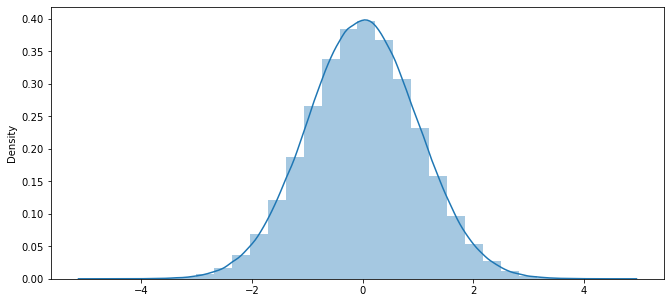

In [77]:
n = 1000000
epsilon = np.random.normal(loc=0, scale=1, size=n)
sns.distplot(epsilon, bins=30)

In [78]:
np.mean(epsilon)

-0.0005247050852273574